In [1]:
from astropy.io import fits
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from astropy.timeseries import BoxLeastSquares
import scipy.signal
from scipy.signal import find_peaks
from scipy.signal import savgol_filter
from lightkurve import search_lightcurve
import transitFinderFunctions as courseworkb
import importlib


# Reload the courseworkb module to ensure the latest version is used
importlib.reload(courseworkb)


<module 'transitFinderFunctions' from '/home/omcevoy/AstroCourseworkB/transitFinderFunctions.py'>

In [2]:
target =  'Kepler-11'
kepler_dataframe_not_nice, stellar_data = courseworkb.fetch_kepler_data_and_stellar_info_normalise_entire_curve(target)

file_path = 'CourseworkData/Objectlc'
kepler_dataframe = courseworkb.loadDataFromFitsFiles(file_path)


4375 4375 4375ght curve segment 62 of 62
4573 4573 4573
4203 4203 4203
4634 4634 4634
4397 4397 4397
4044 4044 4044
4754 4754 4754
4768 4768 4768
1556 1556 1556
3279 3279 3279
4757 4757 4757
4421 4421 4421
4398 4398 4398
4354 4354 4354
4370 4370 4370
1639 1639 1639
4780 4780 4780


In [3]:
cursed_list = []
for _ in range(50000):
    temp_list = []
    for _ in range(1):
        kepler_dataframe_tmp = courseworkb.loadDataFromFitsFiles(file_path, filter_type='savgol', randomise=True)
        temp_list.append(kepler_dataframe_tmp)
        #cursed_list.append(average_df)
    
    # Calculate the average of the 40 dataframes
    #average_df = pd.concat(temp_list).groupby(level=0).mean()

cursed_list = temp_list

lightcurve_1 = cursed_list[0]
print(lightcurve_1.head())

4375 4375 4375
4573 4573 4573
4203 4203 4203
4634 4634 4634
4397 4397 4397
4044 4044 4044
4754 4754 4754
4768 4768 4768
1556 1556 1556
3279 3279 3279
4757 4757 4757
4421 4421 4421
4398 4398 4398
4354 4354 4354
4370 4370 4370
1639 1639 1639
4780 4780 4780
4375 4375 4375
4573 4573 4573
4203 4203 4203
4634 4634 4634
4397 4397 4397
4044 4044 4044
4754 4754 4754
4768 4768 4768
1556 1556 1556
3279 3279 3279
4757 4757 4757
4421 4421 4421
4398 4398 4398
4354 4354 4354
4370 4370 4370
1639 1639 1639
4780 4780 4780
4375 4375 4375
4573 4573 4573
4203 4203 4203
4634 4634 4634
4397 4397 4397
4044 4044 4044
4754 4754 4754
4768 4768 4768
1556 1556 1556
3279 3279 3279
4757 4757 4757
4421 4421 4421
4398 4398 4398
4354 4354 4354
4370 4370 4370
1639 1639 1639
4780 4780 4780
4375 4375 4375
4573 4573 4573
4203 4203 4203
4634 4634 4634
4397 4397 4397
4044 4044 4044
4754 4754 4754
4768 4768 4768
1556 1556 1556
3279 3279 3279
4757 4757 4757
4421 4421 4421
4398 4398 4398
4354 4354 4354
4370 4370 4370
1639 1639 

In [4]:
print(len(kepler_dataframe['flux']))
print(len(kepler_dataframe_not_nice['flux']))

64464
1899237


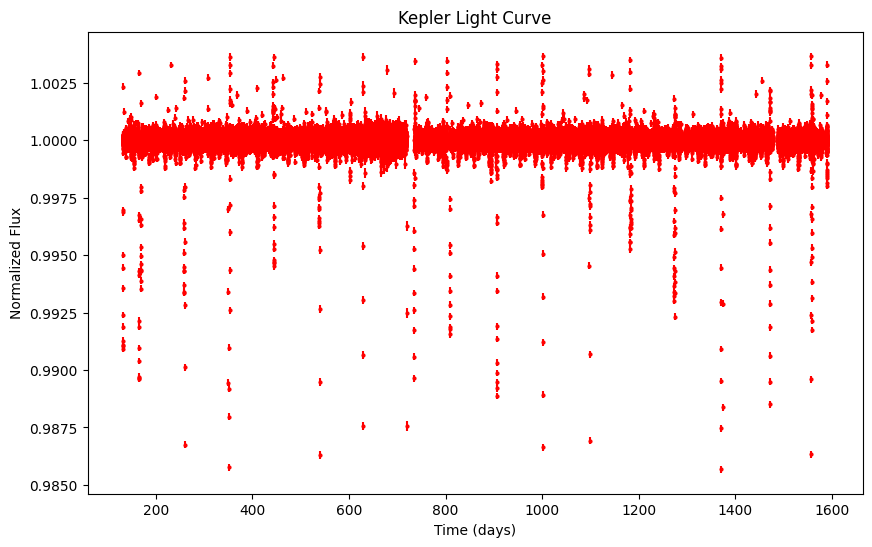

In [5]:
courseworkb.plot_light_curve(kepler_dataframe['time'], kepler_dataframe['flux'], kepler_dataframe['error'])

Running Lomb-Scargle Periodogram Analysis...


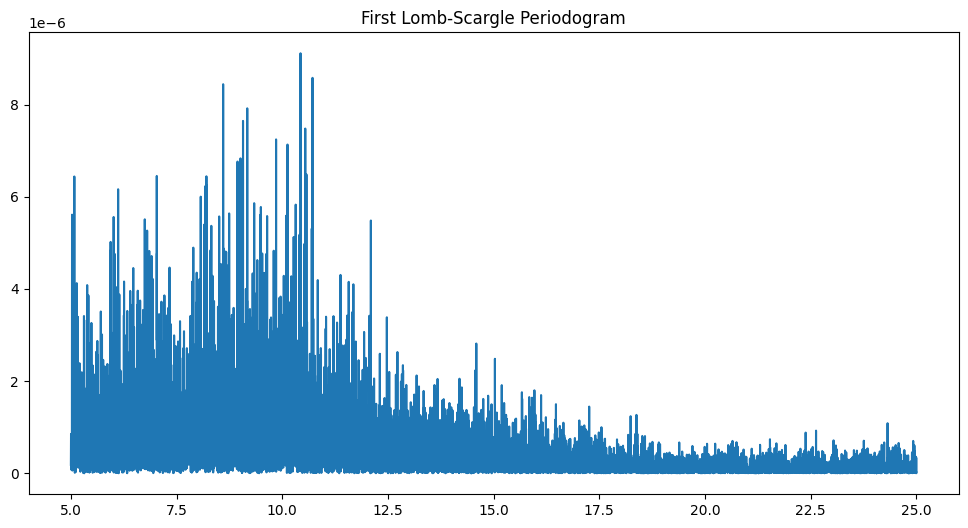

computing second periodogram
List of random light curves present, computing random light curves


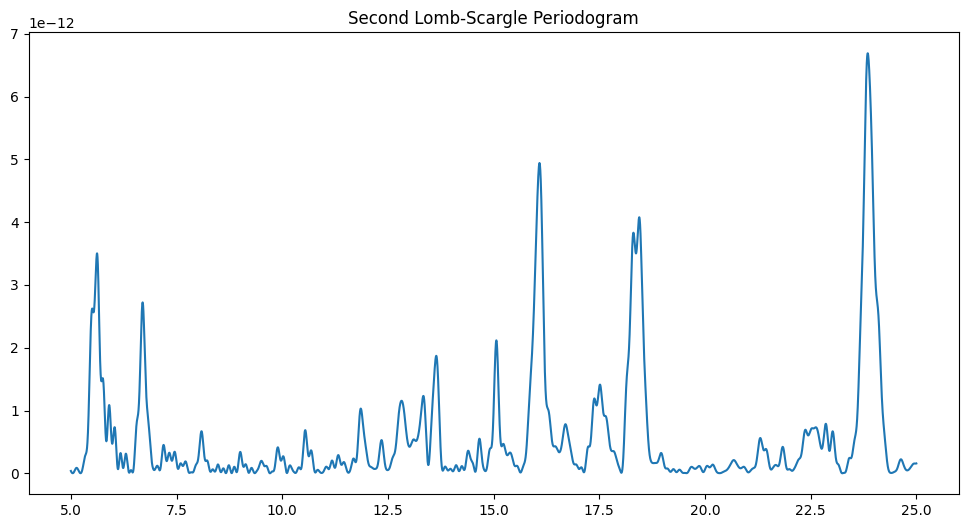

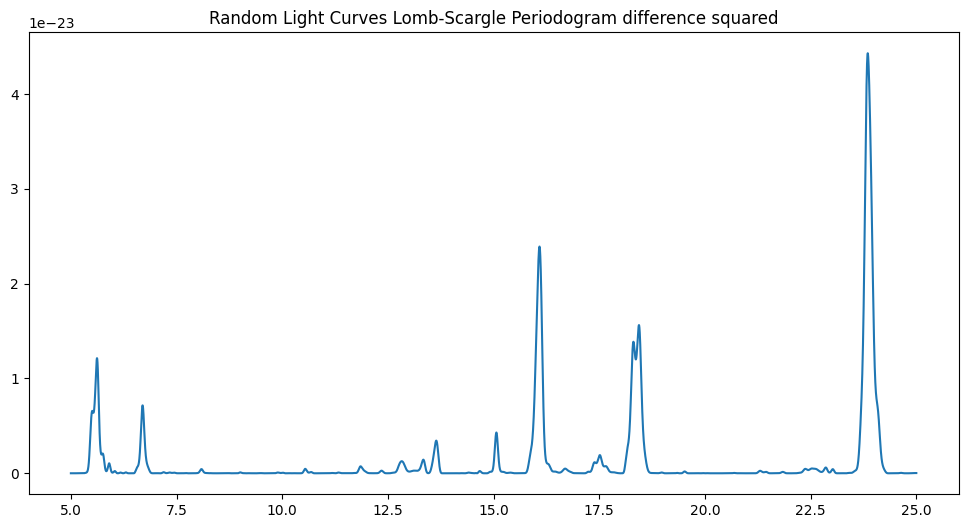

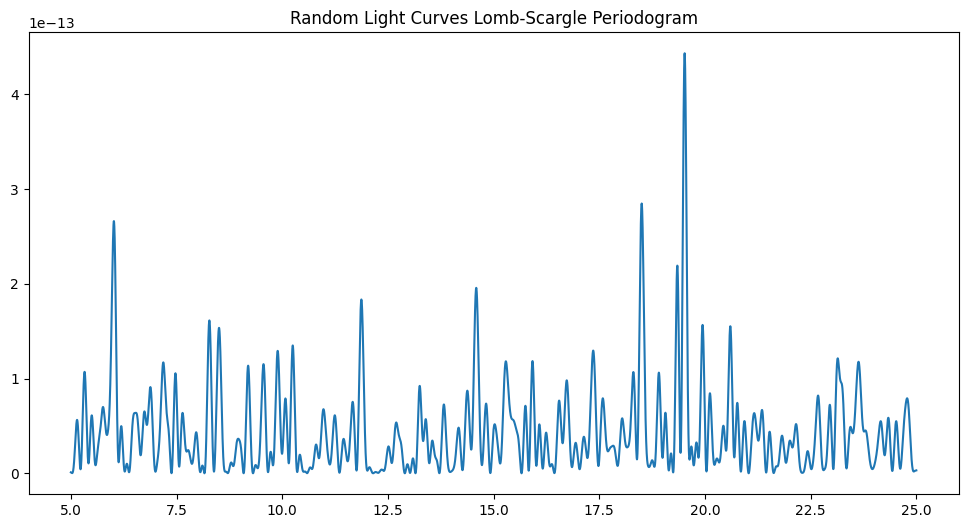

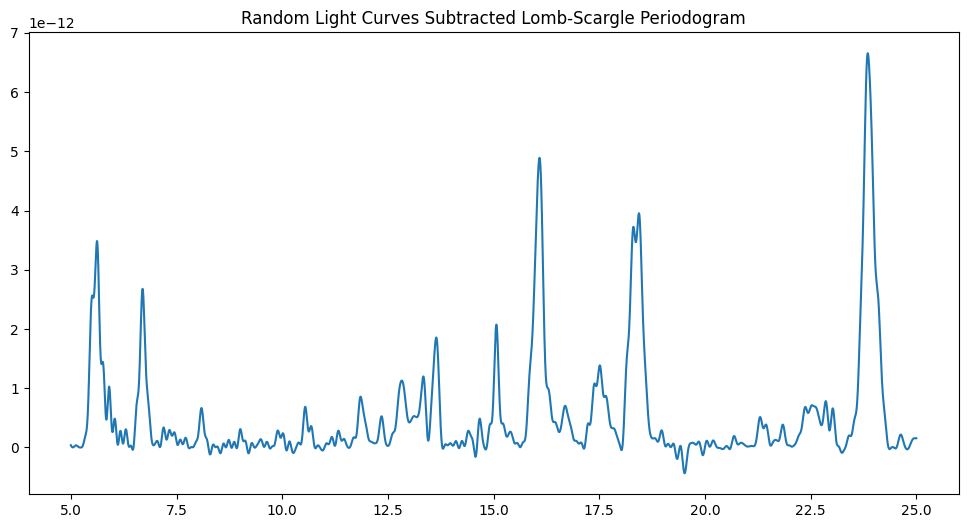

Gradient Threshold: 1.11e-25, Second Derivative Threshold: 1.92e-21


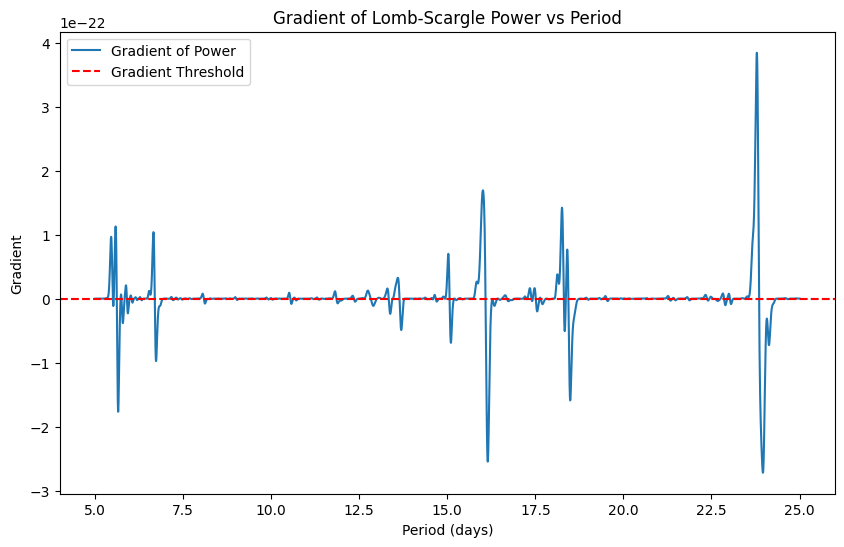

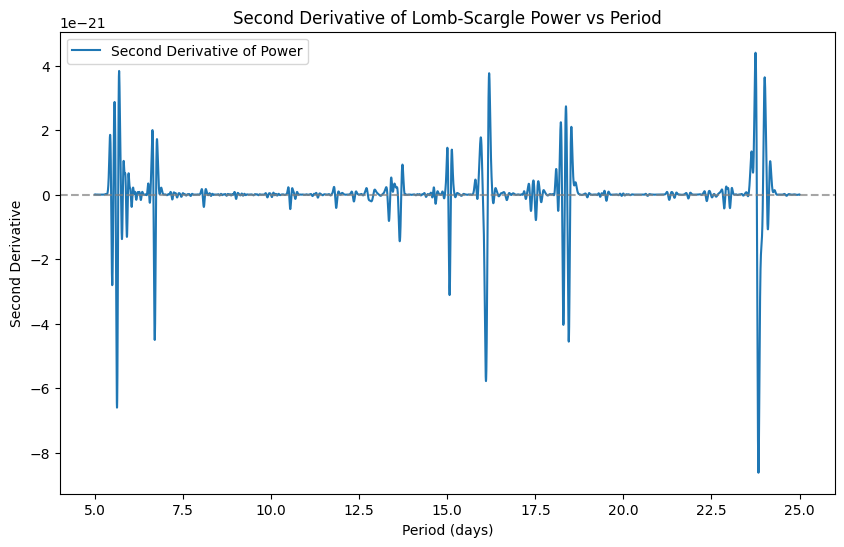

Excluding peaks before period = 5.00 days
Lomb-Scargle Periodogram analysis done


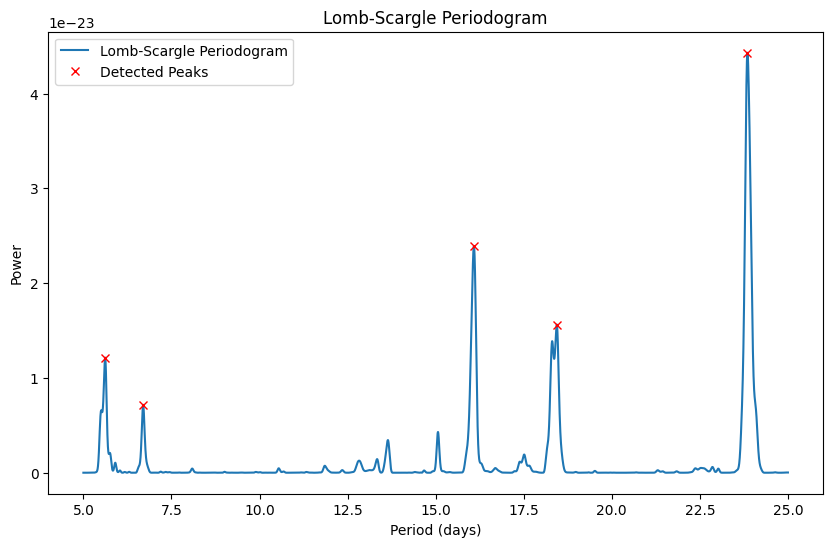

In [6]:
# period_range_zoom =(1,20)
# peaks_of_lightcurve_zoom = courseworkb.run_lomb_scargle_analysis(kepler_dataframe,resolution=5000, period_range=period_range_zoom , list_of_random_lightcurves=cursed_list)

period_range_regular = (5 ,25)
peaks_of_lightcurve = courseworkb.run_lomb_scargle_analysis(kepler_dataframe,resolution=5000, period_range=period_range_regular,list_of_random_lightcurves=cursed_list)

# add 2 sets of peak to the same array
#peaks_of_lightcurve = np.concatenate((peaks_of_lightcurve_zoom,peaks_of_lightcurve),axis=0)

In [7]:
print(len(peaks_of_lightcurve))
peaks_of_lightcurve_filt = courseworkb.remove_exact_duplicates(peaks_of_lightcurve,0.05, False)
print(len(peaks_of_lightcurve_filt))




results_list_no_filter = courseworkb.analyze_peaks_with_bls(
      kepler_dataframe["time"].values,
      kepler_dataframe["flux"].values,
      kepler_dataframe["error"].values,
      peaks_of_lightcurve_filt,
      50000
)





5
Adding period 5.618 days to the unique results.
Adding period 6.696 days to the unique results.
Adding period 16.085 days to the unique results.
Adding period 18.439 days to the unique results.
Adding period 23.852 days to the unique results.
5
Analyzing period 5.62 days...
Analyzing period 6.70 days...
Analyzing period 16.09 days...
Analyzing period 18.44 days...
Analyzing period 23.85 days...
Best Period: 5.459573112854397, Best Duration: 0.245, Best Transit Time: 131.89675988536578
Best Period: 6.512409655133797, Best Duration: 0.17500000000000002, Best Transit Time: 138.17675988536578
Best Period: 15.997700283038565, Best Duration: 0.148, Best Transit Time: 138.16625988536578
Best Period: 17.266320048873226, Best Duration: 0.01, Best Transit Time: 145.3372598853658
Best Period: 22.687651387791234, Best Duration: 0.199, Best Transit Time: 148.4297598853658


In [8]:


print(f"Number of peaks found: {len(results_list_no_filter)}")

results_list = courseworkb.remove_duplicate_periods(results_list_no_filter,0.1,0.1, 0.2)

print(f"Number of peaks found after removing duplicates: {len(results_list)}")


Number of peaks found: 5
Adding period 5.460 days to the unique results.
Adding period 6.512 days to the unique results.
Adding period 15.998 days to the unique results.
Adding period 22.688 days to the unique results.
Adding period 5.460 days to the final results.
Adding period 6.512 days to the final results.
Number of peaks found after removing duplicates: 2


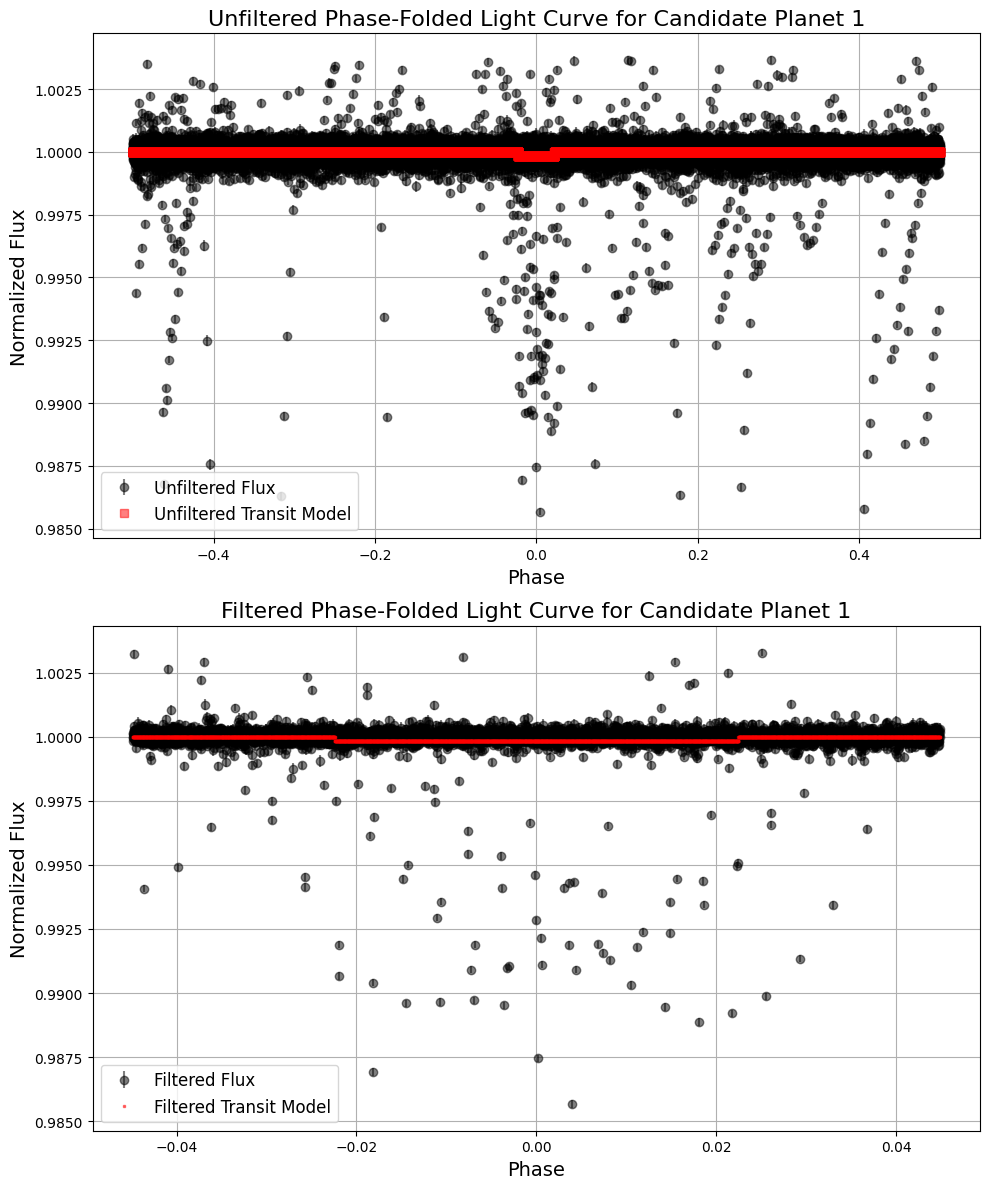

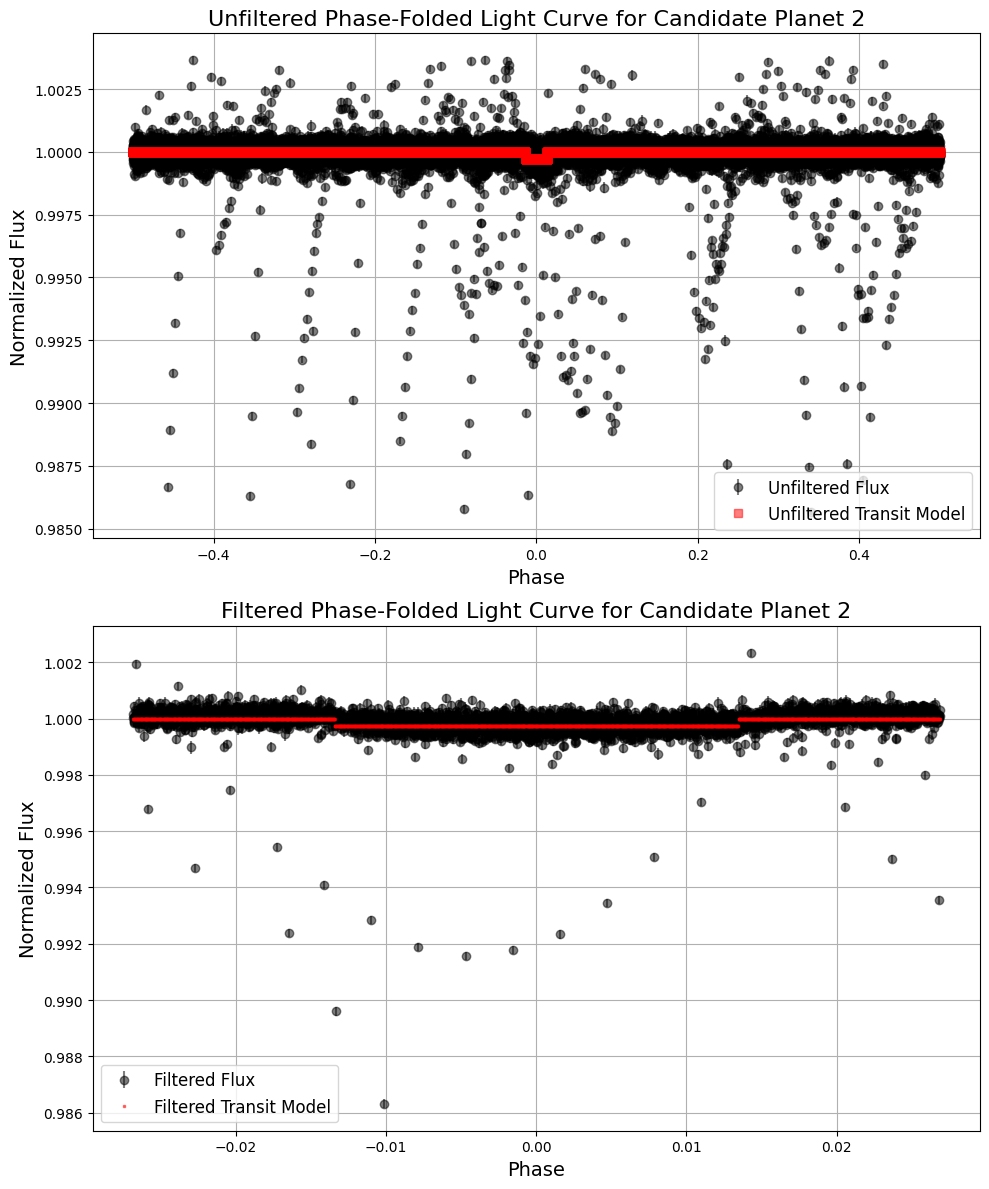

In [9]:
# Reload the courseworkb module to ensure the latest version is used
importlib.reload(courseworkb)
courseworkb.plot_phase_folded_light_curves(kepler_dataframe,results_list )

In [10]:
courseworkb.summarize_results(results_list,stellar_data)



Detected Planet Candidates:
----------------------------------------
Stellar Radius: 1.046 Solar Radii
Stellar Temperature: 5657 K
----------------------------------------

----------------------------------------
Candidate 1:
  Initial Period = 5.62 days
  Refined Period = 5.46 days
  Transit Depth  = 1.46e-04
  Transit Duration = 0.24 days
  Power = 1304.47
----------------------------------------
Best Transit Candidate: Period = 5.46 days, Depth = 1.46e-04
Estimated Planet Radius: 0.013 Solar Radii
Estimated Planet Radius: 1.379 Earth Radii
Estimated Planet Radius: 0.126 Jupiter Radii

----------------------------------------
Candidate 2:
  Initial Period = 6.70 days
  Refined Period = 6.51 days
  Transit Depth  = 2.51e-04
  Transit Duration = 0.18 days
  Power = 2275.51
----------------------------------------
Best Transit Candidate: Period = 6.51 days, Depth = 2.51e-04
Estimated Planet Radius: 0.017 Solar Radii
Estimated Planet Radius: 1.808 Earth Radii
Estimated Planet Radius: 0